In [251]:
!pip3 install numpy

In [531]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [532]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv', header = None)

# Extract the header from the first row and create a list of attributes names
attribute_names = df.iloc[0].tolist()
df.columns = attribute_names
# Create a DataFrame from the remaining rows (excluding the first one)
df = df[1:]


# Convert specific columns to numeric
columns_to_convert = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts', 'IsActiveMember', 'HasCrCard', 'Exited']
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Define X as dataset
X = df
print('X:', X.shape)

# Removing the redundant and focusing on relevant features
X = X.drop(X.columns[:3], axis=1)
print('X after removing features:', X.shape)

X: (10000, 14)
X after removing features: (10000, 11)


In [533]:
# Using visualizations (like histograms and box plots) to understand the distribution of the features.
def explore_continuous_features(X, continuous_columns):
    # Plot histograms for continuous features
    X[continuous_columns].hist(figsize=(10, 8))
    plt.suptitle('Histograms of Continuous Features')
    plt.show()

    # Create box plots for each continuous feature
    for col in continuous_columns:
        plt.figure(figsize=(8, 6))
        plt.boxplot(X[col], tick_labels=[col])  # Using 'tick_labels'
        plt.title(f'Box Plot of Continuous Feature ({col})')
        plt.ylabel('Values')
        plt.grid(True)
        plt.show()

# Create a histogram for a specified column in the dataset.
def plot_histogram(data, column, bins, title, xlabel, ylabel, xticks=None, colors='skyblue'):
    plt.figure(figsize=(6, 4))
    plt.hist(data[column], bins=bins, edgecolor='black', alpha=0.7, color=colors)  # Use the specified color
    if xticks is not None:
        plt.xticks(xticks)  # Set custom x-ticks if provided
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Function to plot the distribution of the target variable
def plot_churn_distribution(X, Y):
    # Calculate counts of Exited (1) and Not Exited (0)
    counts = Y.value_counts()

    # Set figure size
    plt.figure(figsize=(8, 5))

    # Create bar plot
    plt.bar(counts.index, counts.values, color=['#66c2a5', '#fc8d62'])

    # Set title and labels
    plt.title('Distribution of Target Variable (Exited)')
    plt.xlabel( 'Exited (Exited: 1, Not Exited: 0)')
    plt.ylabel('Count')
    plt.xticks(counts.index, ['Not Exited (0)', 'Exited (1)'])

    # Display the plot
    plt.show()

# Define Sigmoid function
def sigmoid(z):
    # Clip z to avoid overflow in exp, limits to -500 and 500 are arbitrary but reasonable
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

# Define Cost function
def compute_cost(y, p_hat):
    m = len(y)
    # Small epsilon value to avoid log(0) and log(1)
    epsilon = 1e-10
    cost = - (1/m) * np.sum(y * np.log(p_hat + epsilon) + (1 - y) * np.log(1 - p_hat + epsilon))
    return cost

# Prediction function
def predict(X_train, weights, threshold=0.6):
    # Compute the linear combination of input features and weights and converts into a probability p∈[0,1]
    p_hat = sigmoid(np.dot(X_train, weights))
    return (p_hat >= threshold).astype(int), p_hat

# k-fold split function
def k_fold_split(X, Y, k):
    """Splits the dataset into k folds."""
    m = X.shape[0]
    fold_size = m // k
    indices = np.random.permutation(m)  # Shuffle indices
    folds = []

    for i in range(k):
        start = i * fold_size
        end = start + fold_size if i < k - 1 else m
        fold_indices = indices[start:end]
        folds.append((X[fold_indices], Y[fold_indices]))

    return folds

# Model Evaluation using Confusion Matrix
# Confusion Matrix Function
def calculate_metrics(Y_train, Y_pred):
    tp = np.sum((Y_train == 1) & (Y_pred == 1))
    tn = np.sum((Y_train == 0) & (Y_pred == 0))
    fp = np.sum((Y_train == 0) & (Y_pred == 1))
    fn = np.sum((Y_train == 1) & (Y_pred == 0))

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    
    return np.array([[tn, fp], [fn, tp]]) , accuracy, precision, recall, f1_score

# Plottting ROC Curve
def plot_roc_curve(Y_train, Y_hat):
    thresholds = np.linspace(0, 1, 100)
    tpr = []  # True Positive Rate (Recall)
    fpr = []  # False Positive Rate
    
    for threshold in thresholds:
        Y_pred = np.where(Y_hat >= threshold, 1, 0)
        cm, accuracy, precision, recall, f1_score  = calculate_metrics(Y_train, Y_pred)
        tn, fp, fn, tp = cm.ravel()
        
        tpr.append(tp / (tp + fn))  # True Positive Rate
        fpr.append(fp / (fp + tn))  # False Positive Rate

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {np.trapz(tpr, fpr):.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random model
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('ROC Curve')
    plt.legend(loc="best")
    plt.show()

# Visualize the predicted probabilities of churn for customers using a histogram
def plot_churn_probabilities(y_pred_probs):
    # Set figure size
    plt.figure(figsize=(8, 5))

    # Plot the histogram of predicted probabilities
    plt.hist(y_pred_probs, bins=20, color='skyblue', edgecolor='black')

    # Set title and labels
    plt.title('Histogram of Predicted Churn Probabilities')
    plt.xlabel('Predicted Probability of Churn')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

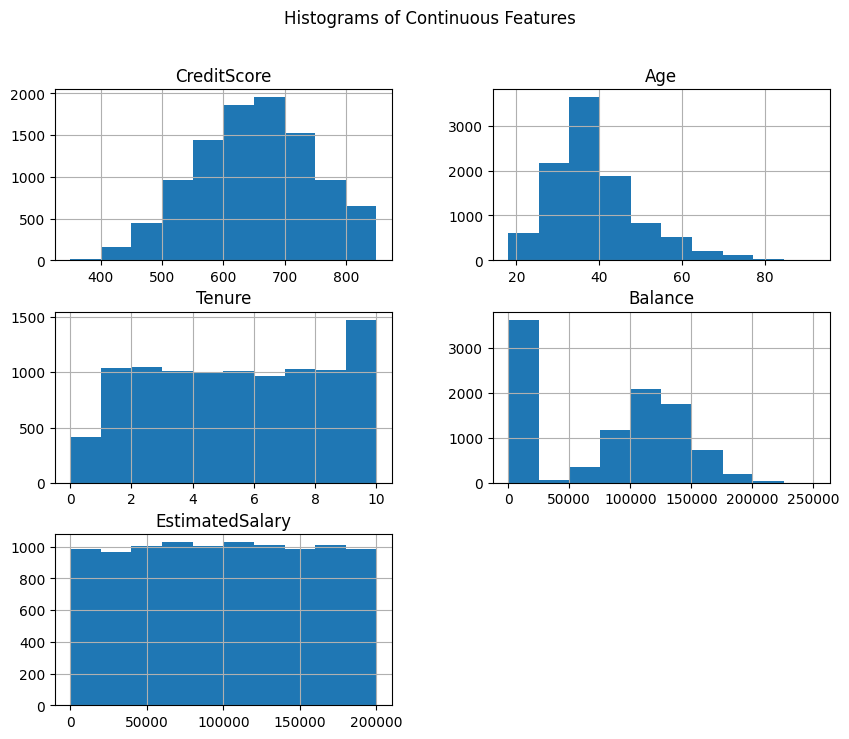

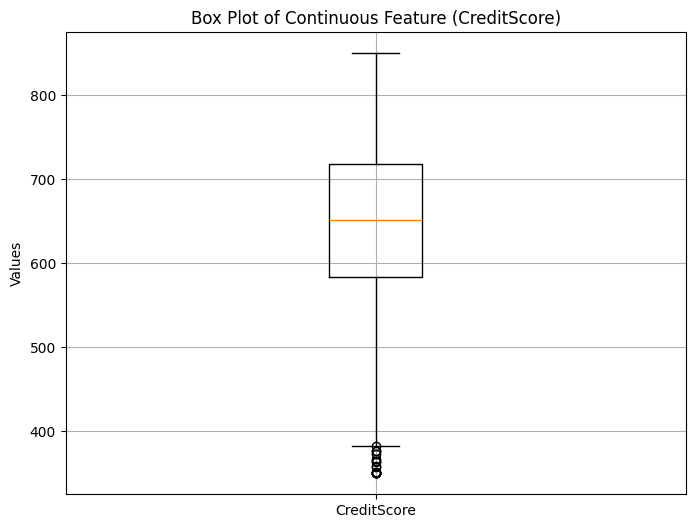

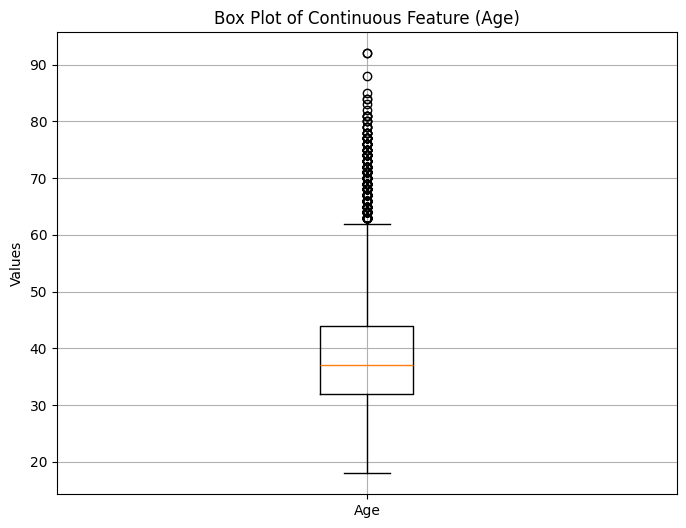

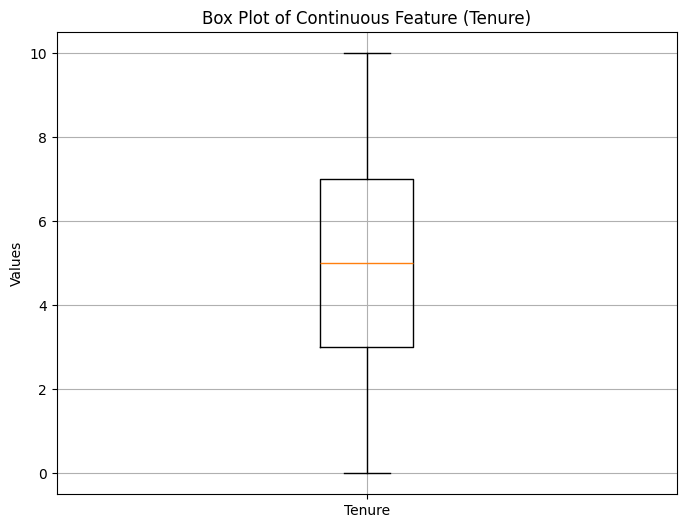

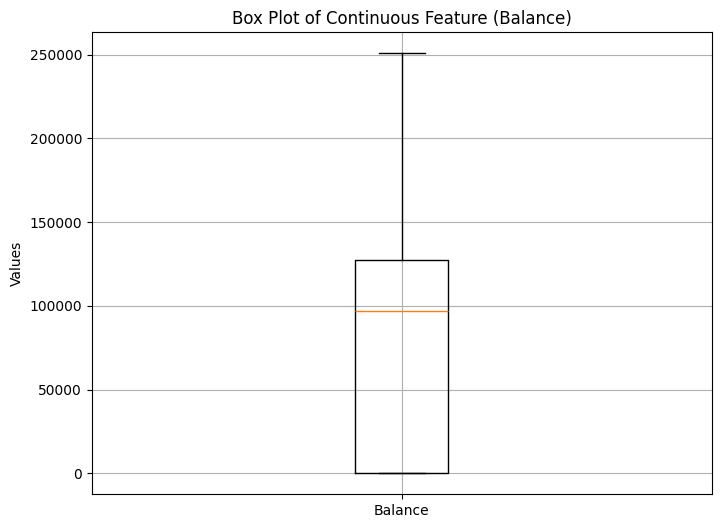

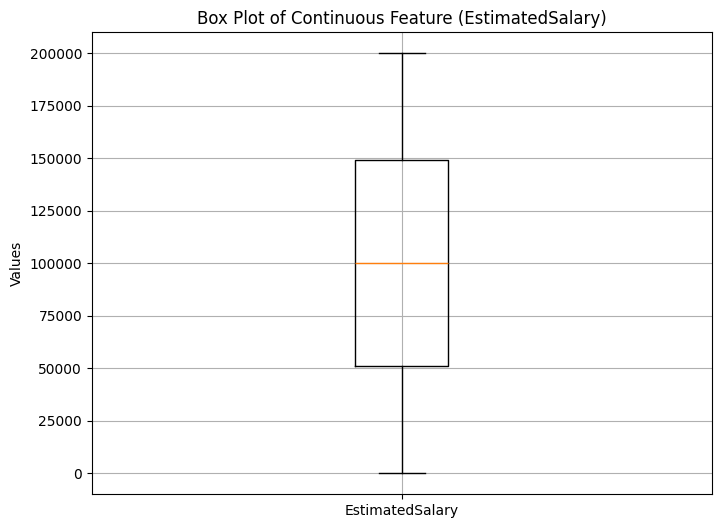

In [534]:
# Define continuous columns
continuous_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
# Call the function with the dataset
explore_continuous_features(X, continuous_columns)

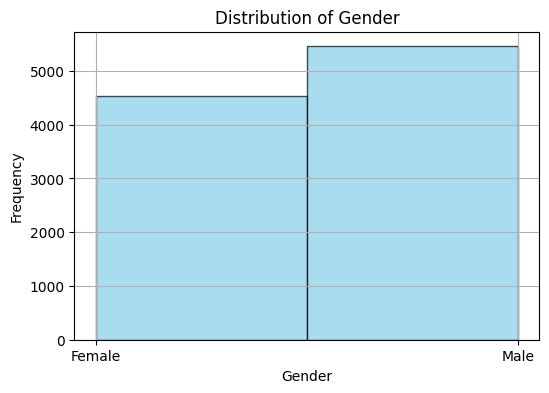

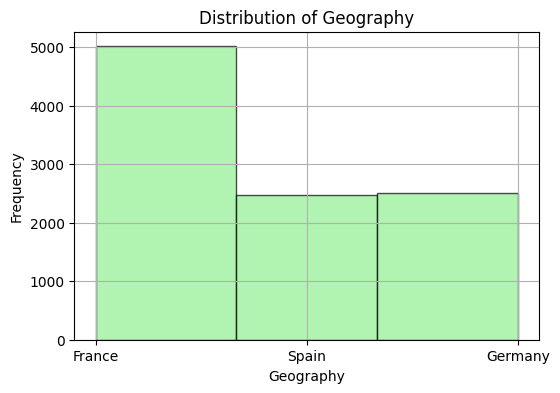

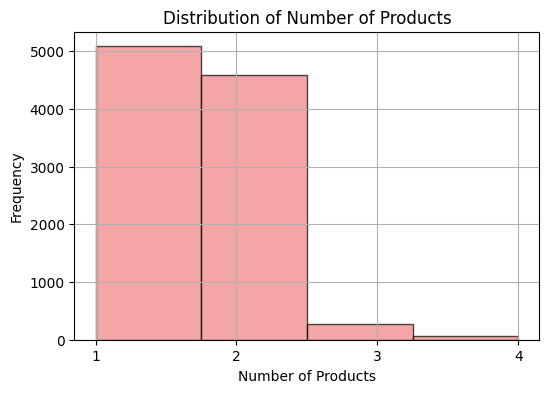

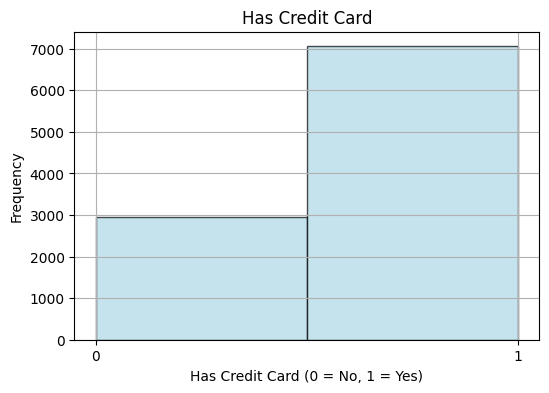

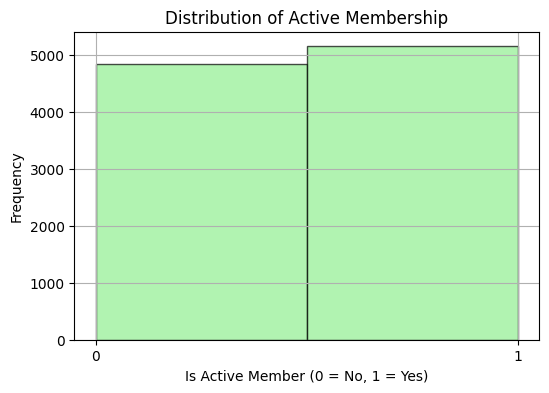

In [535]:
# Plot histogram for Gender
plot_histogram(X, 'Gender', bins=2, title='Distribution of Gender', xlabel='Gender', ylabel='Frequency', xticks=[0, 1])

# Plot histogram for Geography (assume values are 'Spain', 'France', 'Germany')
plot_histogram(X, 'Geography', bins=3, title='Distribution of Geography', xlabel='Geography', ylabel='Frequency', colors='lightgreen')

# Plot histogram for NumOfProducts
plot_histogram(X, 'NumOfProducts', bins=4, title='Distribution of Number of Products', xlabel='Number of Products', ylabel='Frequency', xticks=[1, 2, 3, 4], colors='lightcoral')

# Plot histogram for HasCrCard
plot_histogram(X, 'HasCrCard', bins=2, title='Has Credit Card', xlabel='Has Credit Card (0 = No, 1 = Yes)', ylabel='Frequency', xticks=[0, 1], colors='lightblue')

# Plot histogram for IsActiveMember
plot_histogram(X, 'IsActiveMember', bins=2, title='Distribution of Active Membership', xlabel='Is Active Member (0 = No, 1 = Yes)', ylabel='Frequency', xticks=[0, 1], colors='lightgreen')


In [536]:
# Handle Missing Data
# Checking for missing values
missing_values_X = X.isnull().sum()
print("Missing values in each column of X:", missing_values_X[missing_values_X > 0])

Missing values in each column of X: Series([], dtype: int64)


In [537]:
# Label Encoding for Gender: 'Male' -> 1, 'Female' -> 0 
X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0}) 

# One-Hot Encoding for Geography, generating Geography_Germany and Geography_Spain 
X = pd.get_dummies(X, columns=['Geography'], drop_first=True) 

# Convert boolean columns (True/False) to integers (1/0) for one-hot encoded columns 
X['Geography_Germany'] = X['Geography_Germany'].astype(int) 
X['Geography_Spain'] = X['Geography_Spain'].astype(int) 
#X['Geography_France'] = X['Geography_France'].astype(int)

print(X.head())

   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
1          619       0   42       2       0.00              1          1   
2          608       0   41       1   83807.86              1          0   
3          502       0   42       8  159660.80              3          1   
4          699       0   39       1       0.00              2          0   
5          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  
1               1        101348.88       1                  0                0  
2               1        112542.58       0                  0                1  
3               0        113931.57       1                  0                0  
4               0         93826.63       0                  0                0  
5               1         79084.10       0                  0                1  


In [538]:
# Feature Scaling
# Standardizing manually (scaling to mean 0, std 1)
#X['Age'] = (X['Age'] - X['Age'].mean()) / X['Age'].std()  # Standardizing 'Age'
#X['Balance'] = (X['Balance'] - X['Balance'].mean()) / X['Balance'].std()  # Standardizing 'Balance'
X['Tenure'] = (X['Tenure'] - X['Tenure'].mean()) / X['Tenure'].std()  # Standardizing 'Tenure'
#X['EstimatedSalary'] = (X['EstimatedSalary'] - X['EstimatedSalary'].mean()) / X['EstimatedSalary'].std()  # Standardizing 'EstimatedSalary'
#X['CreditScore'] = (X['CreditScore'] - X['CreditScore'].mean()) / X['CreditScore'].std()  # Standardizing 'CreditScore'
#X['NumOfProducts'] = (X['NumOfProducts'] - X['NumOfProducts'].mean()) / X['NumOfProducts'].std()  # Standardizing 'NumOfProducts'
# Display the standardized columns
print(X[['Balance', 'Tenure', 'EstimatedSalary', 'CreditScore', 'NumOfProducts']].head())

     Balance    Tenure  EstimatedSalary  CreditScore  NumOfProducts
1       0.00 -1.041708        101348.88          619              1
2   83807.86 -1.387468        112542.58          608              1
3  159660.80  1.032856        113931.57          502              3
4       0.00 -1.387468         93826.63          699              2
5  125510.82 -1.041708         79084.10          850              1


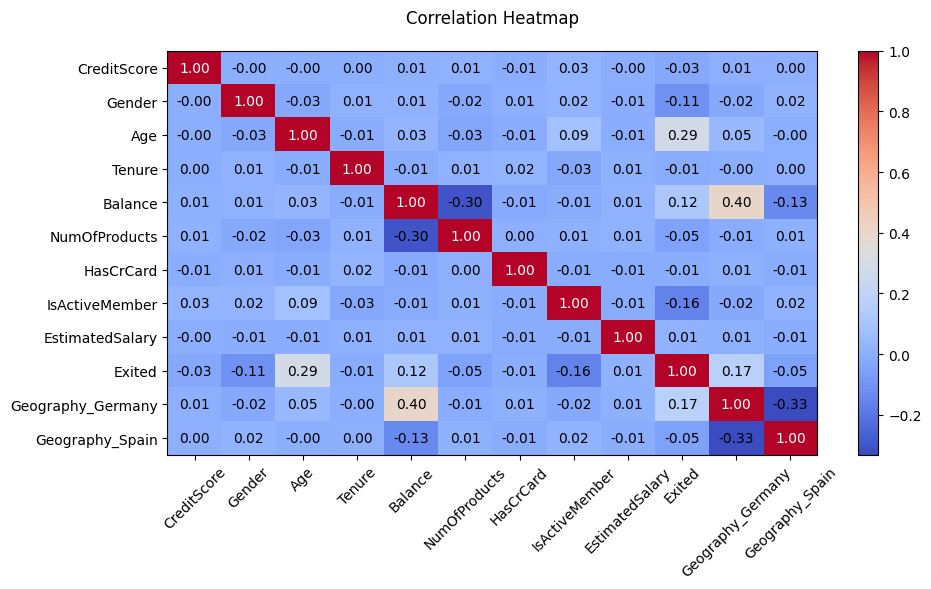

In [539]:
# Plotting Correlation Heatmap
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a figure for the heatmap
plt.figure(figsize=(10, 6))

# Create the heatmap using imshow
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')

# Add color bar
plt.colorbar()

# Set ticks and labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

# Set title
plt.title('Correlation Heatmap', pad=20)

# Annotate the heatmap with correlation coefficients
for (i, j), value in np.ndenumerate(correlation_matrix.values):
    plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='white' if abs(value) > 0.5 else 'black')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the title and labels
plt.show()

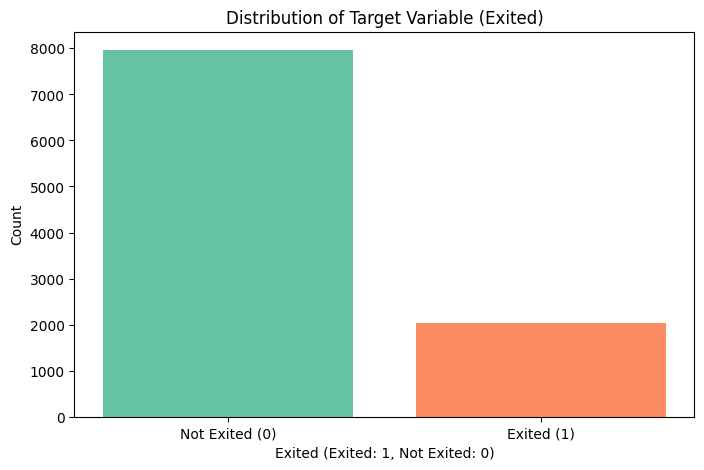

In [540]:
# Call the function with X ( X contains the 'Exited' column)
plot_churn_distribution(X, X['Exited'])

In [541]:
# Train-Test Split
# Creating separate DataFrames for Exited and Not_Exited and then spliting the train and test data for resolving class imbalance
X_not_exited = X[X['Exited'] == 0]
X_exited = X[X['Exited'] == 1]

# Define Y
Y = X['Exited']

# Define the size of the training set
train_size = 0.8

# Calculate the number of samples for training from each class
train_size_not_exited = int(len(X_not_exited) * train_size)
train_size_exited = int(len(X_exited) * train_size)

# Randomly sample the training data from each class
X_not_exited_train = X_not_exited.sample(n=train_size_not_exited, random_state=42)
X_exited_train = X_exited.sample(n=train_size_exited, random_state=42)

# Combine the training sets
X_train = pd.concat([X_not_exited_train, X_exited_train])

# Shuffle the training set
X_train = X_train.sample(frac=1, random_state=42).reset_index(drop=True)

#Creating the test set
X_not_exited_test = X_not_exited.drop(X_not_exited_train.index)
X_exited_test = X_exited.drop(X_exited_train.index)

# Combine the test sets
X_test = pd.concat([X_not_exited_test, X_exited_test])

# Shuffle the test set
X_test = X_test.sample(frac=1, random_state=42).reset_index(drop=True)

# Removing the target variable - features (X) and target (Y)
Y_train = X_train['Exited']
Y_test = X_test['Exited']

X_train = X_train.drop(columns=['Exited'])
X_test = X_test.drop(columns=['Exited'])

# Tabulate Y with counts and percentages
# Ensure the target variable (Churn) is balanced in both sets.
def tabulate_counts_and_percentages(y):
    tabulated = y.value_counts().sort_index()
    percentage = (tabulated / y.count()) * 100
    return pd.DataFrame({'Count': tabulated, 'Percentage': percentage})

# Tabulate Y for test and train datasets
tabulated_df_test = tabulate_counts_and_percentages(Y_test)
tabulated_df_train = tabulate_counts_and_percentages(Y_train)

print(f"Y_test:")
print(tabulated_df_test)
print(f"Y_train:")
print(tabulated_df_train)

Y_test:
        Count  Percentage
Exited                   
0        1593   79.610195
1         408   20.389805
Y_train:
        Count  Percentage
Exited                   
0        6370   79.634954
1        1629   20.365046


In [542]:
#Defining Logistic Regression
def logistic_regression(X_train, Y_train, X_test, Y_test, best_alpha_value, learning_rate, epochs, reg_type='none'):
    m, n = X_train.shape
    W = np.zeros(n + 1) # Weight vector initializatio- we started with a zero vector
    X_train = np.c_[np.ones((m, 1)), X_train] # Add bias term for train set
    X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test] # Add bias term for train set
    costs = []

    best_alpha = None
    if reg_type in ['l1', 'l2']:
        #best_alpha = find_best_alpha(X_train, Y_train, X_test, Y_test, reg_type)
        best_alpha = best_alpha_value
        print(f"Best regularization parameter (alpha) for {reg_type}: {best_alpha}")

    for epoch in range (epochs):
        # Compute the linear combination of input features and weights and converts into a probability p∈[0,1]
        p_hat = sigmoid(np.dot(X_train,W)) # Learn the model
        
        # Compute the Cost function
        cost = compute_cost(Y_train, p_hat)
        costs.append(cost)

        if reg_type == 'l2':
            gradient = (1/m) * np.dot(X_train.T, (p_hat - Y_train)) + 2*best_alpha*W # Gradient
        elif reg_type == 'l1':
            gradient = (1/m) * np.dot(X_train.T, (p_hat - Y_train)) + best_alpha*np.sign(W) # Gradient
        else:
            gradient = (1/m) * np.dot(X_train.T, (p_hat - Y_train)) # Gradient
        
        W = W-learning_rate * gradient  # Update weight
            
    return W, costs

In [543]:
# Hyperparameter tuning function
def hyperparameter_tuning(X, Y, learning_rates, reg_alphas, reg_type, k=5, epochs=100):
    best_accuracy = 0
    best_params = None

    # Perform k-fold cross-validation for each combination of hyperparameters
    for learning_rate in learning_rates:
        for reg_alpha in reg_alphas:
            # Split the data into k folds
            folds = k_fold_split(X, Y, k)
            accuracies = []

            for i in range(k):
                # Prepare training and validation sets
                val_X, val_Y = folds[i]
                train_X = np.vstack([folds[j][0] for j in range(k) if j != i])
                train_Y = np.hstack([folds[j][1] for j in range(k) if j != i])
                
                # Train the model on the training set
                W, _ = logistic_regression(train_X, train_Y, val_X, val_Y, reg_alpha, learning_rate, epochs, reg_type if reg_alpha > 0 else 'none')

                # Make predictions on the validation set
                val_predictions = sigmoid(np.dot(np.c_[np.ones((val_X.shape[0], 1)), val_X], W))
                val_predictions = np.round(val_predictions)  # Convert probabilities to binary predictions

                # Calculate accuracy
                accuracy = np.mean(val_predictions == val_Y)
                accuracies.append(accuracy)

            # Calculate average accuracy across all folds
            avg_accuracy = np.mean(accuracies)
            print(f"Learning rate: {learning_rate}, Regularization alpha: {reg_alpha}, Accuracy: {avg_accuracy}")

            # Update best parameters
            if avg_accuracy > best_accuracy:
                best_accuracy = avg_accuracy
                best_params = (learning_rate, reg_alpha)

    print(f"Best parameters: Learning rate = {best_params[0]}, Regularization alpha = {best_params[1]}, Accuracy = {best_accuracy}")
    return best_params


learning_rates = [0.00001,0.0001,0.001, 0.01, 0.1]
reg_alphas = [0.01, 0.1, 1, 10]
# Assuming X_train, Y_train, X_test, Y_test are Pandas DataFrames
X_train_np = X_train.values  # Convert to NumPy array
Y_train_np = Y_train.values  # Convert to NumPy array

# Run hyperparameter tuning for L2 regularization
best_lr, best_alpha, = hyperparameter_tuning(X_train_np, Y_train_np, learning_rates, reg_alphas, reg_type='l1', k=5, epochs=100)

Best regularization parameter (alpha) for l1: 0.01
Best regularization parameter (alpha) for l1: 0.01
Best regularization parameter (alpha) for l1: 0.01
Best regularization parameter (alpha) for l1: 0.01
Best regularization parameter (alpha) for l1: 0.01
Learning rate: 1e-05, Regularization alpha: 0.01, Accuracy: 0.6793978769482018
Best regularization parameter (alpha) for l1: 0.1
Best regularization parameter (alpha) for l1: 0.1
Best regularization parameter (alpha) for l1: 0.1
Best regularization parameter (alpha) for l1: 0.1
Best regularization parameter (alpha) for l1: 0.1
Learning rate: 1e-05, Regularization alpha: 0.1, Accuracy: 0.7963394151912631
Best regularization parameter (alpha) for l1: 1
Best regularization parameter (alpha) for l1: 1
Best regularization parameter (alpha) for l1: 1
Best regularization parameter (alpha) for l1: 1
Best regularization parameter (alpha) for l1: 1
Learning rate: 1e-05, Regularization alpha: 1, Accuracy: 0.7963481542776462
Best regularization pa

In [547]:
# Add bias column in new X to map min weight coloumn name
X_train_with_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train] # Add bias term
# Use pandas to create a DataFrame with the bias term
X_train_with_bias_df = pd.DataFrame(X_train_with_bias, columns=['Bias'] + X_train.columns.tolist())

Weights from Logistic Regression: [ -0.0976  -70.59829  -0.27686   7.95106  -0.06303  15.10659  -0.20049
  -0.08496  -0.36226  -8.36793   0.21849  -0.09335]
Having Minimum weight column: Tenure
Predictions on training data: 4666
Training Accuracy: 49.21%
Confusion Matrix: [[2820 3550]
 [ 513 1116]]
Accuracy: 0.4921, Precision: 0.2392, Recall: 0.6851, F1-Score: 0.3546


C:\Users\HP\AppData\Local\Temp\ipykernel_16044\2232283165.py:115: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  plt.plot(fpr, tpr, label=f"ROC curve (AUC = {np.trapz(tpr, fpr):.2f})")


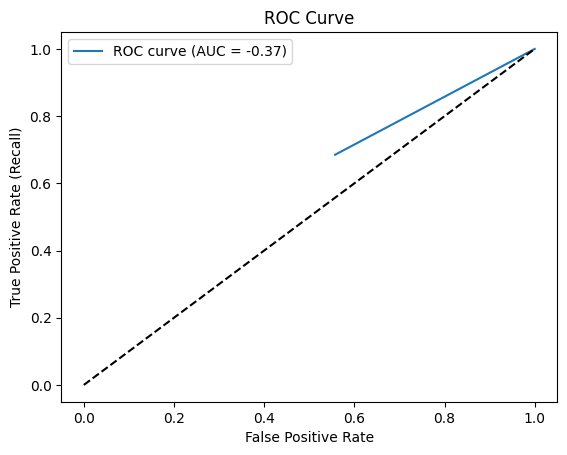

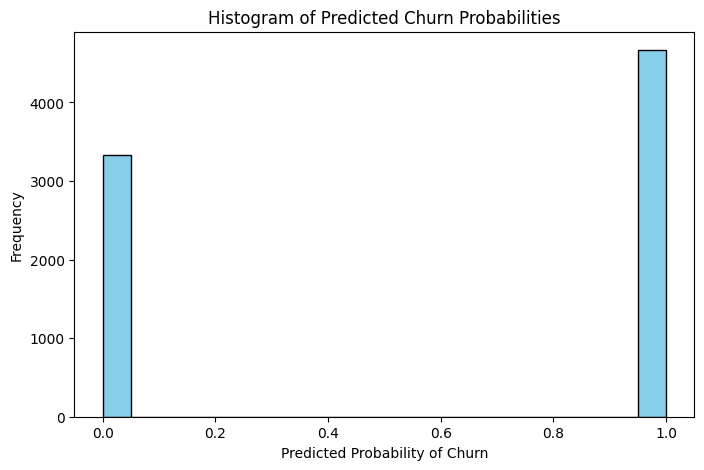

In [551]:
#Training dataset using logistic regression
weights, costs = logistic_regression(X_train, Y_train, X_test, Y_test, best_alpha, learning_rate=0.001, epochs=10000, reg_type='none')

# Use np.set_printoptions to control the display format
np.set_printoptions(suppress=True)
print("Weights from Logistic Regression:", np.round(weights,5))

# Minimum weight feature
min_weight_idx = np.argmin(np.abs(weights[1:])) + 1
column_name= X_train_with_bias_df.columns[min_weight_idx]
print('Having Minimum weight column:',column_name)

# Make predictions after the model has been train
# Set print options to show all values
np.set_printoptions(threshold=np.inf)
predictions, Y_hat = predict(X_train_with_bias, weights)
# Output the predictions, np.sum to count the number of one's
print("Predictions on training data:", np.sum(predictions))

# Optionally, you can compute the accuracy
accuracy = np.mean(predictions == Y_train) * 100
print(f"Training Accuracy: {accuracy:.2f}%")

# Example usage after model prediction
Y_pred = np.where(Y_hat >= 0.6, 1, 0)  # Assuming y_prob is predicted probabilities
cm, accuracy, precision, recall, f1_score = calculate_metrics(Y_train, Y_pred)
print("Confusion Matrix:", cm)
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}")
# Plotting ROC Curve for the model
plot_roc_curve(Y_train, Y_hat)

# Call the function to plot the churn probabilities
plot_churn_probabilities(Y_hat)


Best regularization parameter (alpha) for l1: 1
Weights after applying L1 regularization: [ 0.00001 -0.64816  0.       0.0003   0.       0.04475  0.00001 -0.00001
 -0.00001  0.01597 -0.      -0.     ]
L1 Having Minimum weight column: Tenure
Predictions on training data after L1: 7596
Training Accuracy after L1: 23.98%
Confusion Matrix: [[ 346 6024]
 [  57 1572]]
Accuracy: 0.2398, Precision: 0.2070, Recall: 0.9650, F1-Score: 0.3408


C:\Users\HP\AppData\Local\Temp\ipykernel_16044\2232283165.py:115: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  plt.plot(fpr, tpr, label=f"ROC curve (AUC = {np.trapz(tpr, fpr):.2f})")


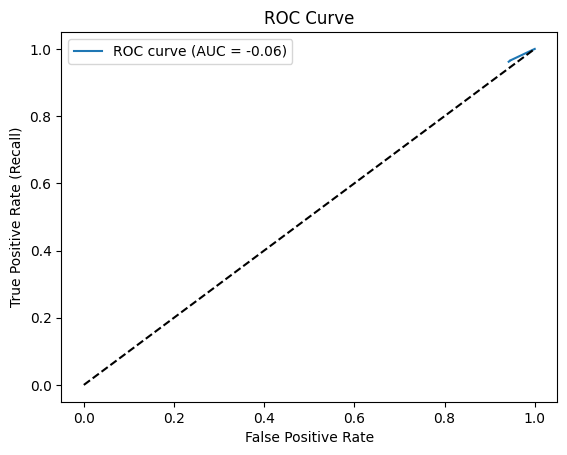

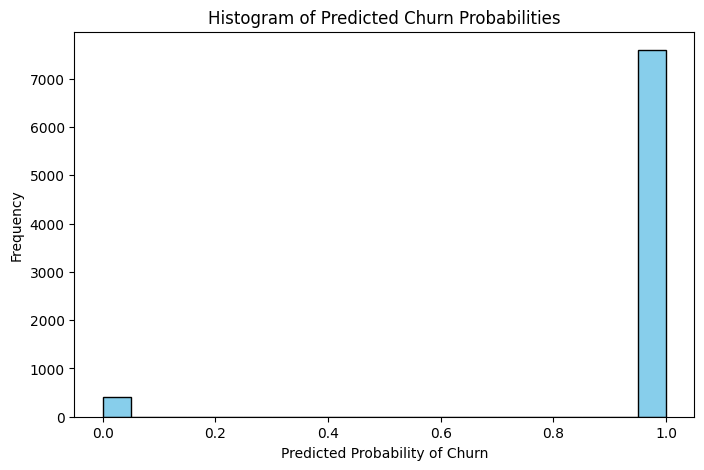

In [552]:
#Training data X_train using logistic regression with L1(Lasso) regularization
weights_l1, costs_l1 = logistic_regression(X_train, Y_train, X_test, Y_test, best_alpha, best_lr, epochs=10000, reg_type='l1')

# Use np.set_printoptions to control the display format
np.set_printoptions(suppress=True)
print("Weights after applying L1 regularization:", np.round(weights_l1,5))
#We tried 100,000 interations and found that after almost 8000 iterations, MSE was almost stagnant around 0.67. 

# Minimum weight feature
min_weight_idx_l1 = np.argmin(np.abs(weights_l1[1:])) + 1
column_name= X_train_with_bias_df.columns[min_weight_idx_l1]
print('L1 Having Minimum weight column:',column_name)

# Make predictions after the model has been train
# Set print options to show all values
np.set_printoptions(threshold=np.inf)
predictions, Y_hat = predict(X_train_with_bias, weights_l1)
# Output the predictions, np.sum to count the number of one's
print("Predictions on training data after L1:", np.sum(predictions))

# Optionally, you can compute the accuracy
accuracy = np.mean(predictions == Y_train) * 100
print(f"Training Accuracy after L1: {accuracy:.2f}%")

# Example usage after model prediction
Y_pred = np.where(Y_hat >= 0.6, 1, 0)  # Assuming y_prob is predicted probabilities
cm, accuracy, precision, recall, f1_score = calculate_metrics(Y_train, Y_pred)
print("Confusion Matrix:", cm)
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}")
# Plotting ROC Curve for the model
plot_roc_curve(Y_train, Y_hat)

# Call the function to plot the churn probabilities
plot_churn_probabilities(Y_hat)

Best regularization parameter (alpha) for l2: 1
Weights after applying L2 regularization: [-0.00096 -0.69287 -0.00273  0.07873 -0.00062 -0.38043 -0.00197 -0.00083
 -0.00357 -0.38967  0.00216 -0.00092]
L2 Having Minimum weight column: Tenure
Predictions on training data after L2: 0
Training Accuracy after L2: 79.63%
Confusion Matrix: [[6370    0]
 [1629    0]]
Accuracy: 0.7963, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000


C:\Users\HP\AppData\Local\Temp\ipykernel_16044\2232283165.py:115: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  plt.plot(fpr, tpr, label=f"ROC curve (AUC = {np.trapz(tpr, fpr):.2f})")


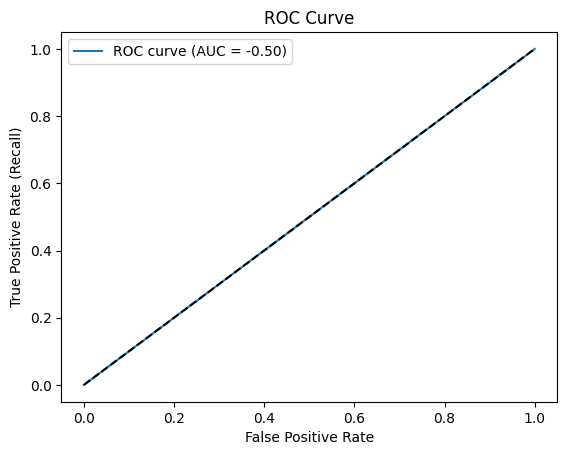

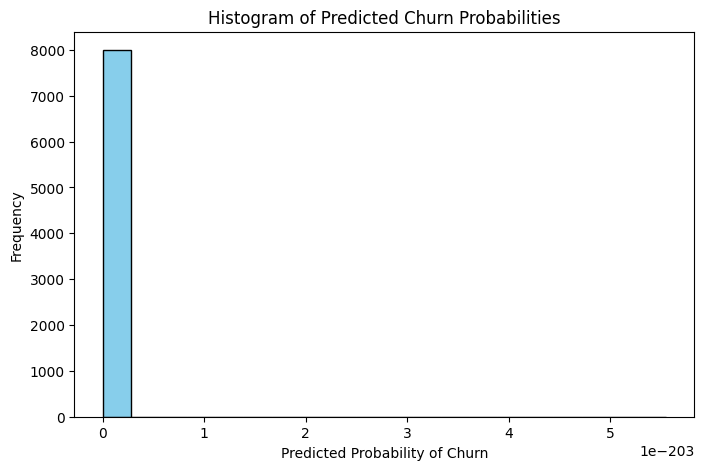

In [553]:
#Training data X_train using logistic regression with L2(Ridge) regularization
weights_l2, costs_l2 = logistic_regression(X_train, Y_train, X_test, Y_test, best_alpha, best_lr, epochs=11000, reg_type='l2')
# Use np.set_printoptions to control the display format
np.set_printoptions(suppress=True)
print("Weights after applying L2 regularization:", np.round(weights_l2,5))
#We tried 100,000 interations and found that after almost 8000 iterations, MSE was almost stagnant around 0.67.  

# Minimum weight feature
min_weight_idx_l2 = np.argmin(np.abs(weights_l2[1:])) + 1
column_name= X_train_with_bias_df.columns[min_weight_idx_l2]
print('L2 Having Minimum weight column:',column_name)

# Make predictions after the model has been train
# Set print options to show all values
np.set_printoptions(threshold=np.inf)
predictions, Y_hat = predict(X_train_with_bias, weights_l2)
# Output the predictions, np.sum to count the number of one's
print("Predictions on training data after L2:", np.sum(predictions))

# Optionally, you can compute the accuracy
accuracy = np.mean(predictions == Y_train) * 100
print(f"Training Accuracy after L2: {accuracy:.2f}%")

# Example usage after model prediction
Y_pred = np.where(Y_hat >= 0.6, 1, 0)  # Assuming y_prob is predicted probabilities
cm, accuracy, precision, recall, f1_score = calculate_metrics(Y_train, Y_pred)
print("Confusion Matrix:", cm)
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}")
# Plotting ROC Curve for the model
plot_roc_curve(Y_train, Y_hat)

# Call the function to plot the churn probabilities
plot_churn_probabilities(Y_hat)

              Feature  Coefficient
0         CreditScore   -70.598292
4             Balance    15.106594
8     EstimatedSalary    -8.367932
2                 Age     7.951057
7      IsActiveMember    -0.362263
1              Gender    -0.276857
9   Geography_Germany     0.218490
5       NumOfProducts    -0.200492
10    Geography_Spain    -0.093354
6           HasCrCard    -0.084961
3              Tenure    -0.063032


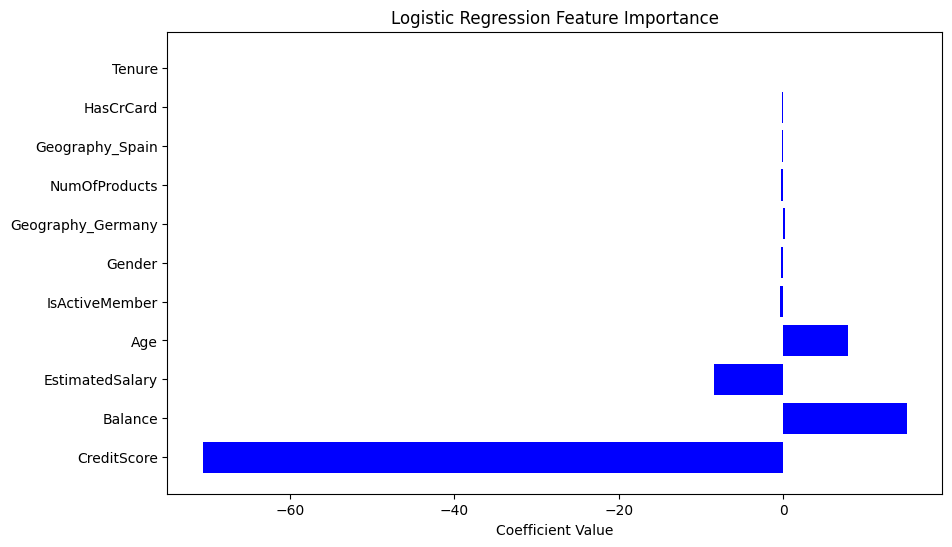

In [554]:
# Prepare feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': weights[1:]  # Exclude the bias term
})

# Sort the features by absolute coefficient values
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print(feature_importance[['Feature', 'Coefficient']])

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='b')
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Feature Importance')
plt.show()

In [555]:
#Removing less important features and trianing the model again
#High important features are : CreditScore, Balance, EstimatedSalary, Age, IsActiveMember 

# Define columns to be removed based on importance
columns_to_remove = ['Gender', 'Geography_Germany', 'NumOfProducts', 'Geography_Spain', 'HasCrCard', 'Tenure']
#columns_to_remove = ['Geography_Spain', 'HasCrCard', 'Tenure']
columns = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 
           'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']  # Replace this with your actual column names list

# Get the indices of the columns to remove
cols_to_remove_indices = [columns.index(col) for col in columns_to_remove]

# Remove those columns from X_train and X_test (which are NumPy arrays)
X_train_reduced = np.delete(X_train, cols_to_remove_indices, axis=1)
X_test_reduced = np.delete(X_test, cols_to_remove_indices, axis=1)
X_train_with_bias_reduced = np.delete(X_train_with_bias, cols_to_remove_indices, axis=1)

Weights from Logistic Regression: [ -0.09344 -67.84835   8.1111   12.69235  -0.36014  15.61804]
Predictions on training data: 3083
Training Accuracy: 60.20%
Confusion Matrix: [[4051 2319]
 [ 865  764]]
Accuracy: 0.6020, Precision: 0.2478, Recall: 0.4690, F1-Score: 0.3243


C:\Users\HP\AppData\Local\Temp\ipykernel_16044\2232283165.py:115: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  plt.plot(fpr, tpr, label=f"ROC curve (AUC = {np.trapz(tpr, fpr):.2f})")


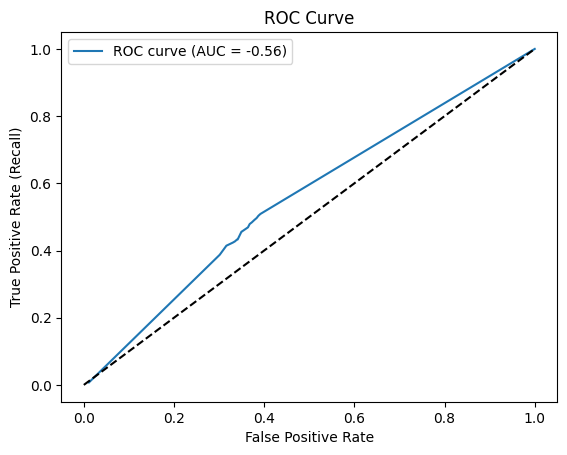

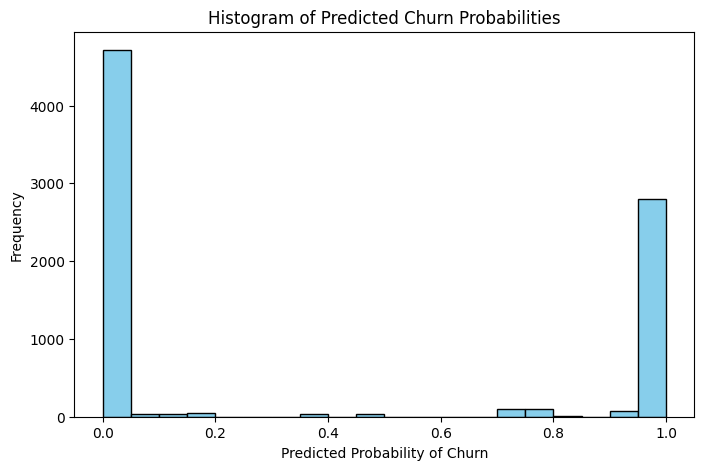

In [526]:
#Evaluating the model with top features using Logistic Regression
weights_reduced, costs = logistic_regression(X_train_reduced, Y_train, X_test_reduced, Y_test, best_alpha, learning_rate=0.001, epochs=10000, reg_type='none')

# Use np.set_printoptions to control the display format
np.set_printoptions(suppress=True)
print("Weights from Logistic Regression:", np.round(weights_reduced,5))

# Make predictions after the model has been train
# Set print options to show all values
np.set_printoptions(threshold=np.inf)
predictions, Y_hat = predict(X_train_with_bias_reduced, weights_reduced)
# Output the predictions, np.sum to count the number of one's
print("Predictions on training data:", np.sum(predictions))

# Optionally, you can compute the accuracy
accuracy = np.mean(predictions == Y_train) * 100
print(f"Training Accuracy: {accuracy:.2f}%")

# Example usage after model prediction
Y_pred = np.where(Y_hat >= 0.5, 1, 0)  # Assuming y_prob is predicted probabilities
cm, accuracy, precision, recall, f1_score = calculate_metrics(Y_train, Y_pred)
print("Confusion Matrix:", cm)
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}")
# Plotting ROC Curve for the model
plot_roc_curve(Y_train, Y_hat)

# Call the function to plot the churn probabilities
plot_churn_probabilities(Y_hat)

Best regularization parameter (alpha) for l1: 1
Weights from Logistic Regression with l1 regression: [ 0.00001 -0.6105   0.00029  0.148    0.       0.02519]
Predictions on training data after l1: 0
Training Accuracy: 79.63%
Confusion Matrix: [[3929 2441]
 [ 820  809]]
Accuracy: 0.5923, Precision: 0.2489, Recall: 0.4966, F1-Score: 0.3316


C:\Users\HP\AppData\Local\Temp\ipykernel_16044\2232283165.py:115: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  plt.plot(fpr, tpr, label=f"ROC curve (AUC = {np.trapz(tpr, fpr):.2f})")


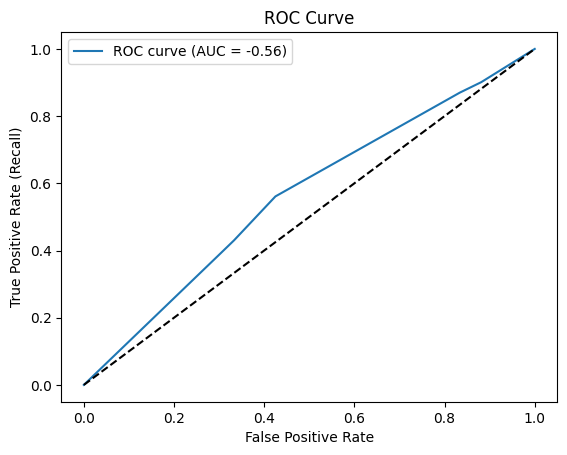

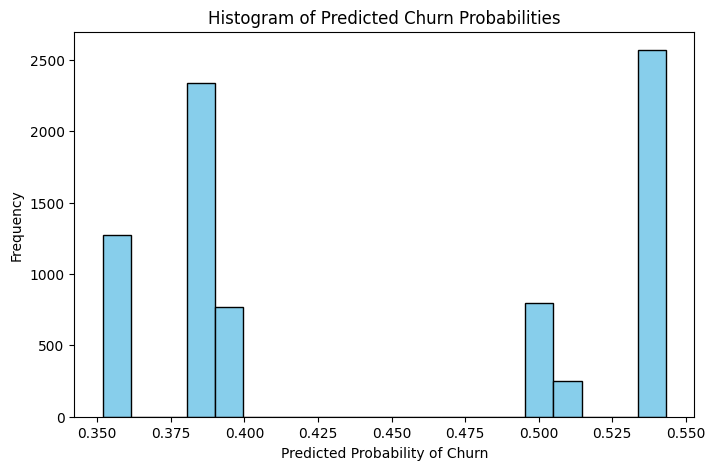

In [527]:
#Evaluating the model with top features using Logistic Regression with l1 regression
weights_reduced_l1, costs = logistic_regression(X_train_reduced, Y_train, X_test_reduced, Y_test, best_alpha, best_lr, epochs=10000, reg_type='l1')

# Use np.set_printoptions to control the display format
np.set_printoptions(suppress=True)
print("Weights from Logistic Regression with l1 regression:", np.round(weights_reduced_l1,5))

# Make predictions after the model has been train
# Set print options to show all values
np.set_printoptions(threshold=np.inf)
predictions, Y_hat = predict(X_train_with_bias_reduced, weights_reduced_l1)
# Output the predictions, np.sum to count the number of one's
print("Predictions on training data after l1:", np.sum(predictions))

# Optionally, you can compute the accuracy
accuracy = np.mean(predictions == Y_train) * 100
print(f"Training Accuracy: {accuracy:.2f}%")

# Example usage after model prediction
Y_pred = np.where(Y_hat >= 0.5, 1, 0)  # Assuming y_prob is predicted probabilities
cm, accuracy, precision, recall, f1_score = calculate_metrics(Y_train, Y_pred)
print("Confusion Matrix:", cm)
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}")
# Plotting ROC Curve for the model
plot_roc_curve(Y_train, Y_hat)

# Call the function to plot the churn probabilities
plot_churn_probabilities(Y_hat)

Best regularization parameter (alpha) for l2: 1
Weights from Logistic Regression with l2 regression: [-0.00097 -0.69979  0.07832 -0.41054 -0.00358 -0.23592]
Predictions on training data after l2: 0
Training Accuracy: 79.63%
Confusion Matrix: [[6105  265]
 [1545   84]]
Accuracy: 0.7737, Precision: 0.2407, Recall: 0.0516, F1-Score: 0.0849


C:\Users\HP\AppData\Local\Temp\ipykernel_16044\2232283165.py:115: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  plt.plot(fpr, tpr, label=f"ROC curve (AUC = {np.trapz(tpr, fpr):.2f})")


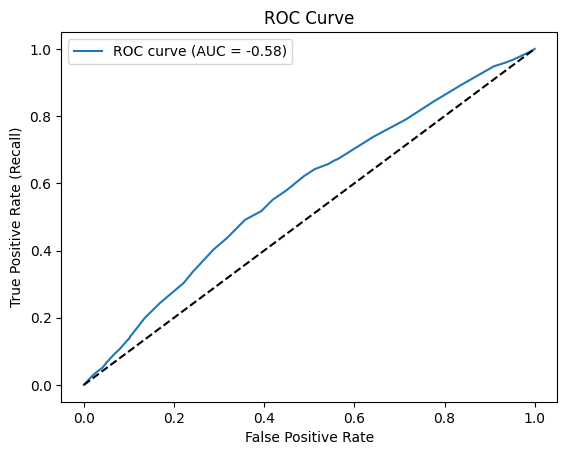

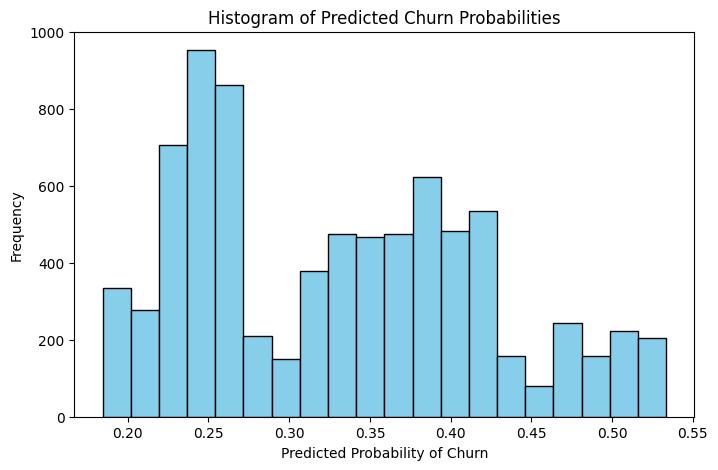

In [529]:
#Evaluating the model with top features using Logistic Regression with l2 regression
weights_reduced_l2, costs = logistic_regression(X_train_reduced, Y_train, X_test_reduced, Y_test, best_alpha, best_lr, epochs=11000, reg_type='l2')

# Use np.set_printoptions to control the display format
np.set_printoptions(suppress=True)
print("Weights from Logistic Regression with l2 regression:", np.round(weights_reduced_l2,5))

# Make predictions after the model has been train
# Set print options to show all values
np.set_printoptions(threshold=np.inf)
predictions, Y_hat = predict(X_train_with_bias_reduced, weights_reduced_l2)
# Output the predictions, np.sum to count the number of one's
print("Predictions on training data after l2:", np.sum(predictions))

# Optionally, you can compute the accuracy
accuracy = np.mean(predictions == Y_train) * 100
print(f"Training Accuracy: {accuracy:.2f}%")

# Example usage after model prediction
Y_pred = np.where(Y_hat >= 0.5, 1, 0)  # Assuming y_prob is predicted probabilities
cm, accuracy, precision, recall, f1_score = calculate_metrics(Y_train, Y_pred)
print("Confusion Matrix:", cm)
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1_score:.4f}")
# Plotting ROC Curve for the model
plot_roc_curve(Y_train, Y_hat)

# Call the function to plot the churn probabilities
plot_churn_probabilities(Y_hat)

In [530]:
# Predicting the churn likelihood for a set of new customers X_test
def predict(W, X_test, Y_test):
    X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Add bias term for test set
    # Compute predictions for the test set
    z = np.dot(X_test, W)
    p_hat = sigmoid(z)
    Y_test_hat = np.where(p_hat >= 0.6, 1, 0) 
    # Calculate Mean Squared Error (MSE)
    test_mse = np.mean((Y_test - Y_test_hat) ** 2)
    test_rmse = np.sqrt(test_mse)
    return Y_test_hat, test_rmse


# Test Evaluation
Y_test_hat, test_rmse = predict(weights_reduced, X_test_reduced, Y_test)
print(f"Test RMSE for Logistic Regression: {test_rmse}")

Y_test_hat_l1, test_rmse_l1 = predict(weights_reduced_l1, X_test_reduced, Y_test)
print(f"Test RMSE for Logistic Regression after applying L1 regularization: {test_rmse_l1}")

Y_test_hat_l2, test_rmse_l2 = predict(weights_reduced_l2, X_test_reduced, Y_test)
print(f"Test RMSE for Logistic Regression after applying L2 regularization: {test_rmse_l2}")


Test RMSE for Logistic Regression: 0.8863448518504516
Test RMSE for Logistic Regression after applying L1 regularization: 0.8775619308793742
Test RMSE for Logistic Regression after applying L2 regularization: 0.45155071805336855
